In [94]:
# EDA 步骤总览

# 1. 读取数据与基本结构查看
# 2. 检查缺失值与重复值
# 3. 目标变量（y）的分布分析：类别不平衡情况
# 4. 特征（X）的统计特性分析（均值、方差等）
# 5. 特征相关性分析（可选）
# 6. 降维可视化（如 PCA 或 t-SNE）
# 7. 小结与对建模的启示

In [95]:
# 1. Read data and basic structure view

In [96]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [97]:
# Read data and basic structure view

In [98]:
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")

# 查看数据维度
print("特征数据维度:", X_train.shape)   
print("标签数据维度:", y_train.shape)   

特征数据维度: (10000, 300)
标签数据维度: (10000, 1)


In [99]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.617940,-0.391980,0.13278,0.032551,0.55201,0.83393,-0.837550,-0.874060,0.43930,0.268260,...,-0.45454,0.36452,1.575300,-0.620320,-0.25371,-0.447750,-0.038273,-0.019938,-0.195500,0.428830
1,0.333860,-1.549100,1.67050,0.793560,0.80251,-0.07206,-0.068276,3.302400,0.52045,0.685720,...,-0.36913,1.74080,1.286600,-0.013396,-1.53930,0.833540,0.472610,0.513030,-0.743140,1.219900
2,0.040399,-0.608070,1.62080,-0.355970,0.12105,1.35250,0.373200,1.111700,0.35894,-0.344100,...,-1.40230,-0.24763,0.507050,0.708220,-0.60083,0.911040,0.009979,-0.475990,-0.094731,-0.008521
3,1.723600,0.195290,1.03880,-3.009100,-0.33222,0.91067,0.666690,0.717250,3.05850,1.489900,...,-1.21540,-0.25284,-1.307800,-0.445660,0.27918,0.264670,-0.149360,1.492900,-1.176700,-1.854500
4,-1.032300,1.900100,-1.46010,0.383710,-0.51039,0.74481,-0.914660,-0.865880,-0.34426,0.869650,...,1.32230,0.06020,-1.079000,-0.617050,1.18450,-0.210630,-0.105870,-0.412040,1.409700,0.133350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.821000,-0.016804,0.36978,-1.652500,1.32370,-0.67655,-1.238000,-0.764210,0.16283,-0.240030,...,-1.25470,-0.76602,1.453600,1.954500,0.47550,-1.824700,-0.227030,1.879700,-1.123800,1.309600
9996,-0.636390,-0.403470,0.81521,-0.665990,-2.16210,2.03190,0.278910,0.169180,0.52821,-0.217570,...,0.42273,-0.07438,-0.958710,-0.030666,-0.43114,0.075285,-0.892370,-0.677320,-1.330200,-0.809090
9997,0.773410,0.157330,-0.82969,-2.569100,1.33060,-0.45354,0.154800,0.010011,0.79613,0.606680,...,-1.15410,-1.75520,-1.645100,0.316050,-0.49966,0.997910,-1.389800,0.773250,0.049626,-0.500440
9998,-0.382970,1.011900,-2.12320,1.385600,0.30195,-0.45940,-0.050270,0.591280,1.49210,0.012371,...,0.24839,0.20263,0.010861,-0.775840,-0.98314,0.216800,1.323800,0.450360,1.586200,-0.289050


In [100]:
y_train

,label
0,10
1,5
2,5
3,5
4,5
...,...
9995,19
9996,5
9997,17
9998,24


In [101]:
 # 2. Check for missing and duplicate values

In [102]:
# 检查特征和标签中的缺失值数量
missing_values_X = X_train.isnull().sum().sum()
missing_values_y = y_train.isnull().sum().sum()

print(f"特征数据缺失值数量：{missing_values_X}")
print(f"标签数据缺失值数量：{missing_values_y}")

# 检查特征数据是否存在重复行
duplicate_rows_X = X_train.duplicated().sum()
print(f"特征数据中的重复行数量：{duplicate_rows_X}")


特征数据缺失值数量：0
标签数据缺失值数量：0
特征数据中的重复行数量：0


In [103]:
# 结论1：数据无缺失值

In [104]:
# 3. Distribution analysis of target variable (y): class imbalance

In [105]:
# 统计label中每一个类别的个数
class_counts = y_train.value_counts()
class_counts

label
5        4479
10       1081
6         553
8         516
12        457
24        385
17        354
26        278
21        269
14        264
4         238
25        184
19        177
20        153
27        107
7         103
11         78
3          65
13         62
18         60
23         41
15         26
9          25
0          18
1           7
22          7
2           7
16          6
Name: count, dtype: int64

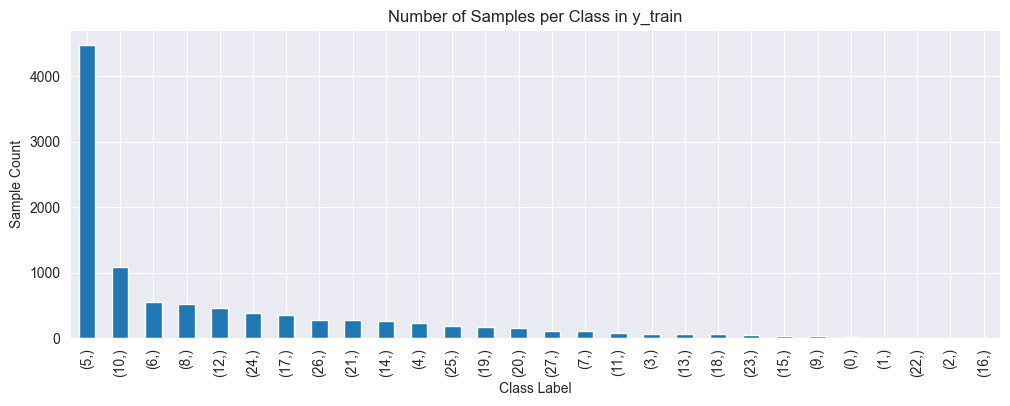

In [106]:
# 绘制柱状图进行表示
plt.figure(figsize=(12,4))
class_counts.plot(kind='bar')
plt.title("Number of Samples per Class in y_train")
plt.xlabel("Class Label")
plt.ylabel("Sample Count")
plt.show()

In [107]:
# 结论2：可以看出来类别分布是完全不均衡的，存在极端多类和极端少类

In [108]:
# 4. Feature statistical analysis

In [109]:
summary_stats = X_train.describe().T  # 每列为一个特征
print("每个特征的均值、标准差、最小值和最大值：")
print(summary_stats[['mean', 'std', 'min', 'max']])

每个特征的均值、标准差、最小值和最大值：
         mean       std      min      max
0   -0.021449  0.986789  -8.1638   4.5750
1   -0.000912  1.008141 -11.9820   4.2322
2    0.012368  1.009709  -3.5020   6.5868
3    0.045447  0.985909  -4.7040   3.8679
4    0.034961  0.988168  -7.0178   7.7052
..        ...       ...      ...      ...
295  0.021120  1.002988  -4.4358   4.6608
296  0.055394  1.000607  -3.7089  11.4290
297  0.013260  0.990364  -8.5983   3.9451
298 -0.045870  0.994845  -5.6691   4.2649
299 -0.096509  0.992540  -5.2105   4.1854

[300 rows x 4 columns]


In [110]:
# 均值分布直方图

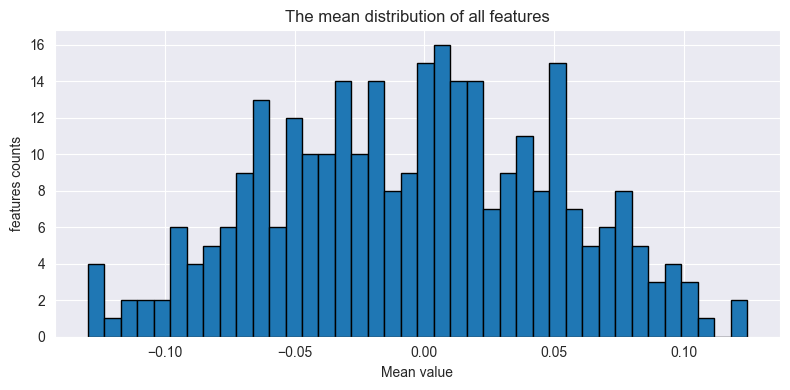

In [111]:
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['mean'], bins=40, edgecolor='black')
plt.title("The mean distribution of all features")
plt.xlabel("Mean value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
# 标准差分布直方图

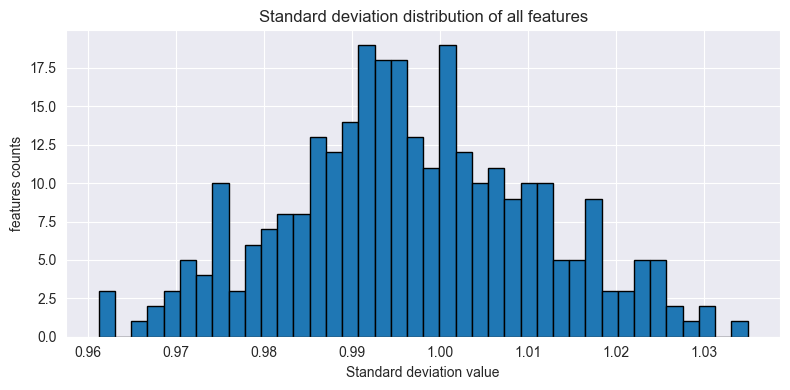

In [113]:
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['std'], bins=40, edgecolor='black')
plt.title("Standard deviation distribution of all features")
plt.xlabel("Standard deviation value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
# 结论3：标准差分布集中，说明原数据已经经过了标准化

In [115]:
# 最小值分布直方图

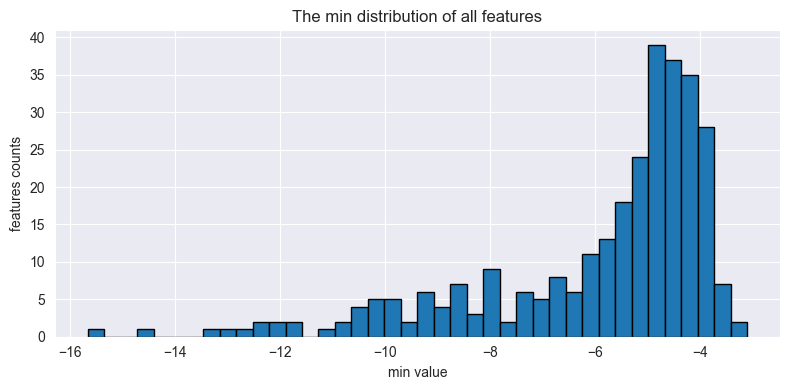

In [116]:
# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['min'], bins=40, edgecolor='black')
plt.title("The min distribution of all features")
plt.xlabel("min value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
# 最大值分布直方图

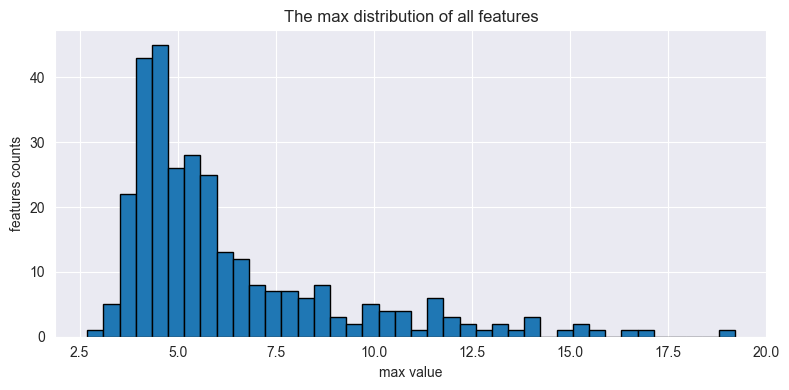

In [118]:
# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['max'], bins=40, edgecolor='black')
plt.title("The max distribution of all features")
plt.xlabel("max value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
# 对标准差进行分析

In [120]:
# 方差为 0 的特征
zero_var_cols = summary_stats[summary_stats['std'] == 0].index.tolist()

# 方差低于阈值0.01的值的数量
low_var_cols = summary_stats[summary_stats['std'] < 0.01].index.tolist()

print(f"方差为 0 的特征数量：{len(zero_var_cols)}")
print(f"方差低于 0.01 的特征数量：{len(low_var_cols)}")


方差为 0 的特征数量：0
方差低于 0.01 的特征数量：0


In [121]:
# 分析离群点

In [122]:
# IQR检测法检测离群点
outlier_counts = []

# 遍历每个特征列
for col in X_train.columns:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1

    # 定义异常值区间
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 计算该列中离群值的数量
    outliers = ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).sum()
    outlier_counts.append((col, outliers))

# 按离群值数量排序
outlier_counts_sorted = sorted(outlier_counts, key=lambda x: x[1], reverse=True)

# 显示离群值最多的前 10 个特征
print("离群值数量最多的前 10 个特征：")
for col, count in outlier_counts_sorted[:10]:
    print(f"特征 {col}: 离群值数量 = {count}")


离群值数量最多的前 10 个特征：
特征 259: 离群值数量 = 271
特征 59: 离群值数量 = 252
特征 119: 离群值数量 = 252
特征 84: 离群值数量 = 246
特征 33: 离群值数量 = 243
特征 242: 离群值数量 = 243
特征 8: 离群值数量 = 241
特征 188: 离群值数量 = 239
特征 180: 离群值数量 = 237
特征 165: 离群值数量 = 236


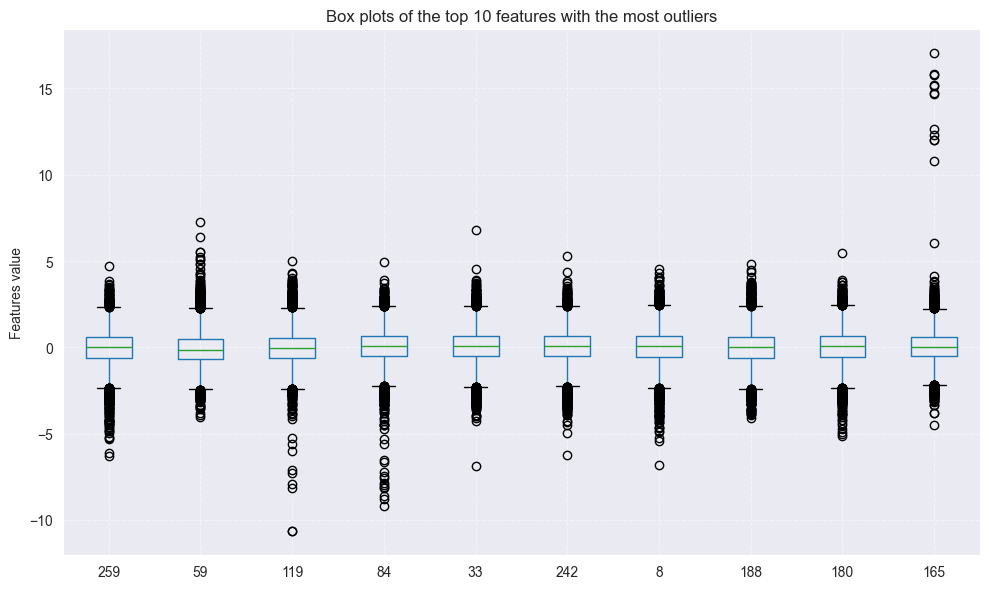

In [123]:
top_outlier_features = [col for col, _ in outlier_counts_sorted[:10]]

plt.figure(figsize=(10, 6))
X_train[top_outlier_features].boxplot()
plt.title("Box plots of the top 10 features with the most outliers")
plt.ylabel("Features value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [124]:
# 结论4：正常情况下，IQR方法下的离群值总数占总样本数量的1%-5%，但该数据多个特征的离群点数目出现了200+个。
# 这代表这些特征的分布是非对称的、长尾的、偏态的

In [125]:
# 小结1：该数据可能不适合用于敏感模型，如Logistics Regression, SVM, KNN, Neural Network
# 原因： 
# Logistics Regression: 某一维特征突然变得极大（比如 999），那这个维度的权重w就会被迫减小，以“抵消”这个巨大值。
# SVM / KNN : 距离中心很远的点变成“伪最近邻”,SVM 边界被极端点推得很远，导致分类性能下降
# Neural Network: 输入某一维有异常大值，激活函数输入过大 → 梯度爆炸或消失，导致模型训练不稳定。

In [126]:
# 正态性分析

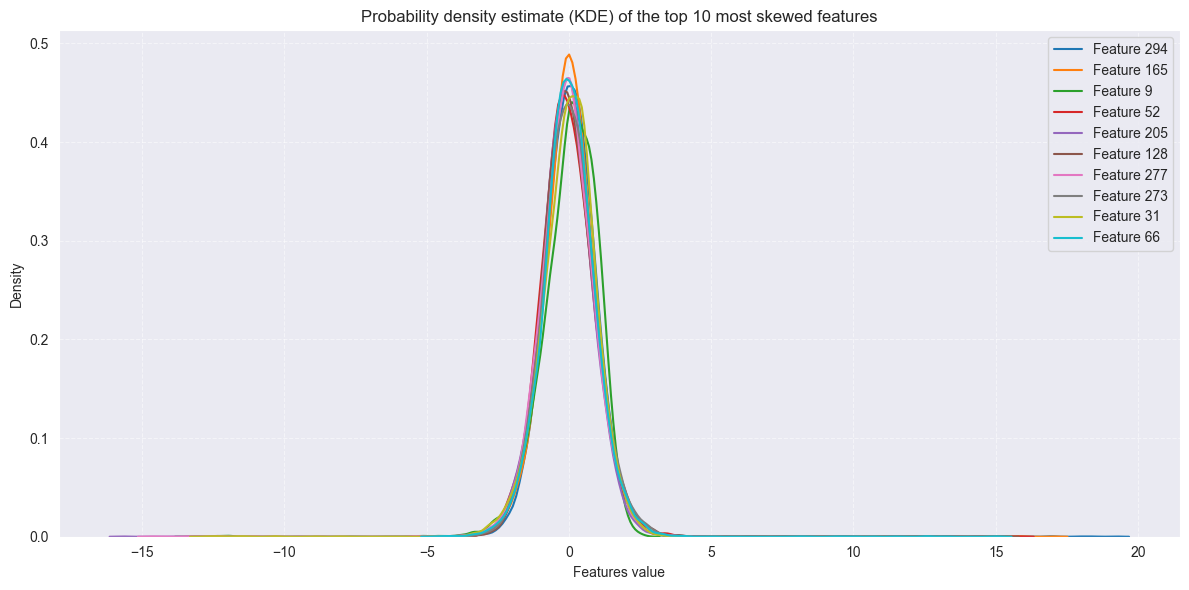

In [127]:
# 计算每个特征的偏度（skewness）并取绝对值排序
skews = X_train.skew().abs().sort_values(ascending=False)

# 获取偏态最大的前10个特征列索引
top_skew_features = skews.head(10).index.tolist()

# 绘制 KDE 图（放在一张图里）
plt.figure(figsize=(12, 6))
for col in top_skew_features:
    sns.kdeplot(X_train[col], label=f"Feature {col}", linewidth=1.5)

plt.title("Probability density estimate (KDE) of the top 10 most skewed features")
plt.xlabel("Features value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [128]:
# 结论5: 这些特征分布具有偏态（skewness），而非对称的高斯分布。
# 数据集中在左边，小数值多，大数值少但极端。所以是右偏（正偏）
# 有些特征的密度曲线在尾部有较宽的拖尾，说明和我们之前 IQR 检测到的“200+ 离群值”是一致的

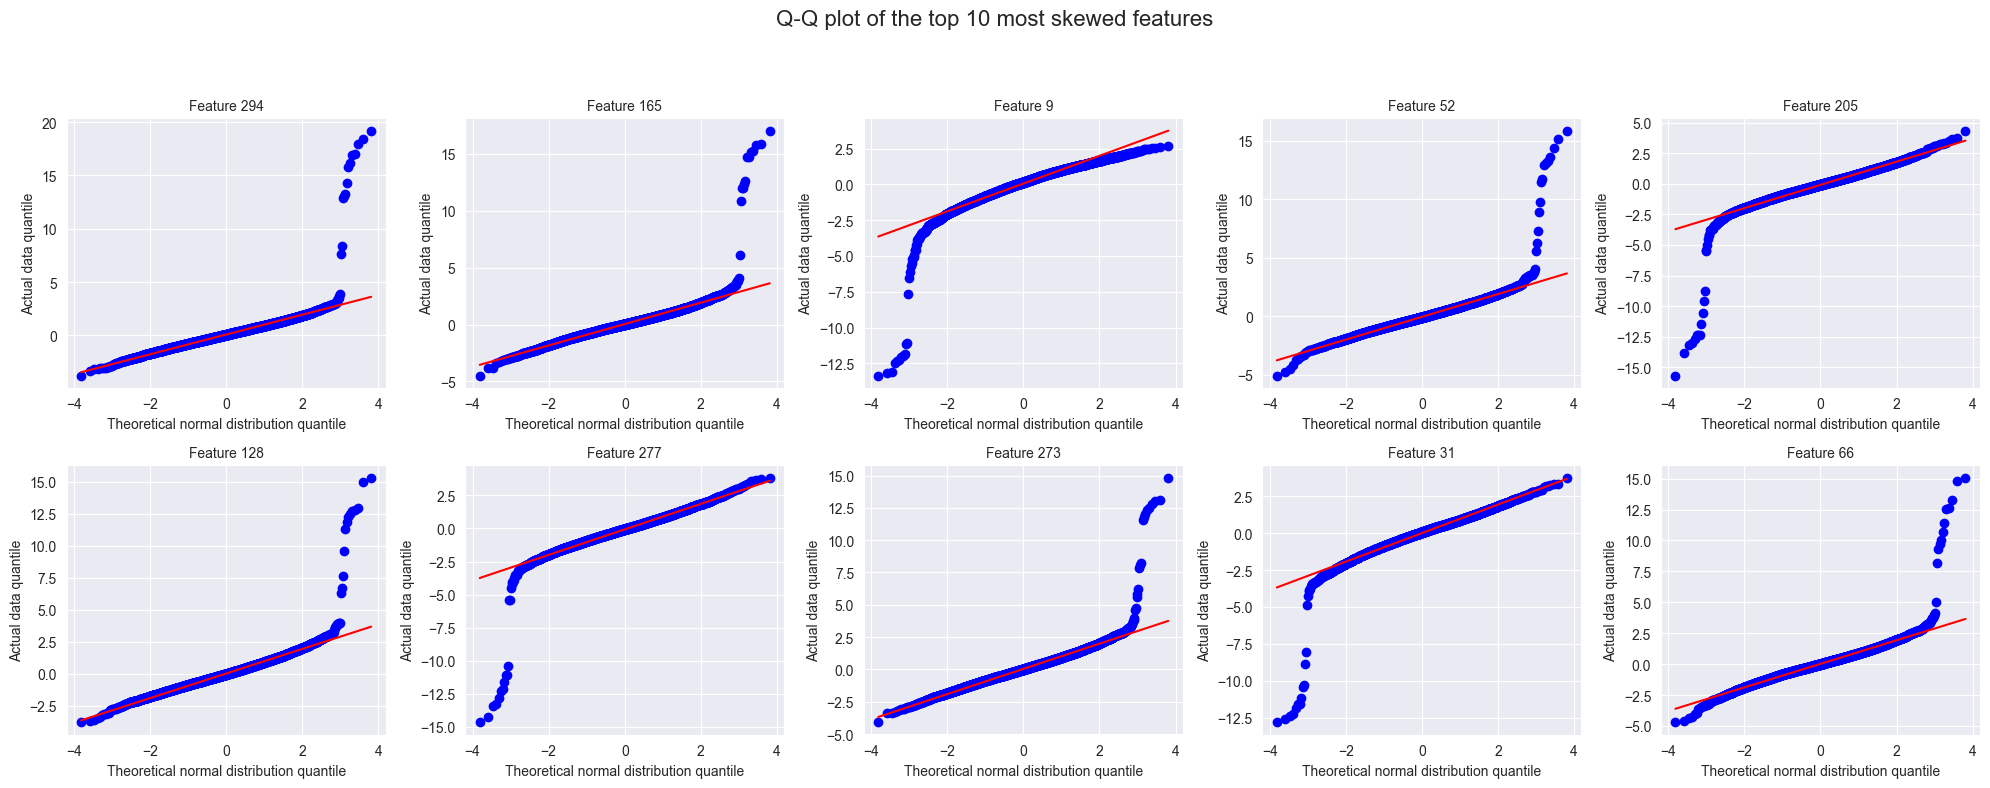

In [129]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(top_skew_features):
    plt.subplot(2, 5, i + 1)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"Feature {col}", fontsize=10)
    plt.xlabel("Theoretical normal distribution quantile")
    plt.ylabel("Actual data quantile")

plt.suptitle("Q-Q plot of the top 10 most skewed features", fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.93))  
plt.show()

In [130]:
# 结论5.1: 尾部向上偏离对角线，是右偏(正偏)

In [131]:
# 5. 特征间的相关性分析 Correlation analysis between features

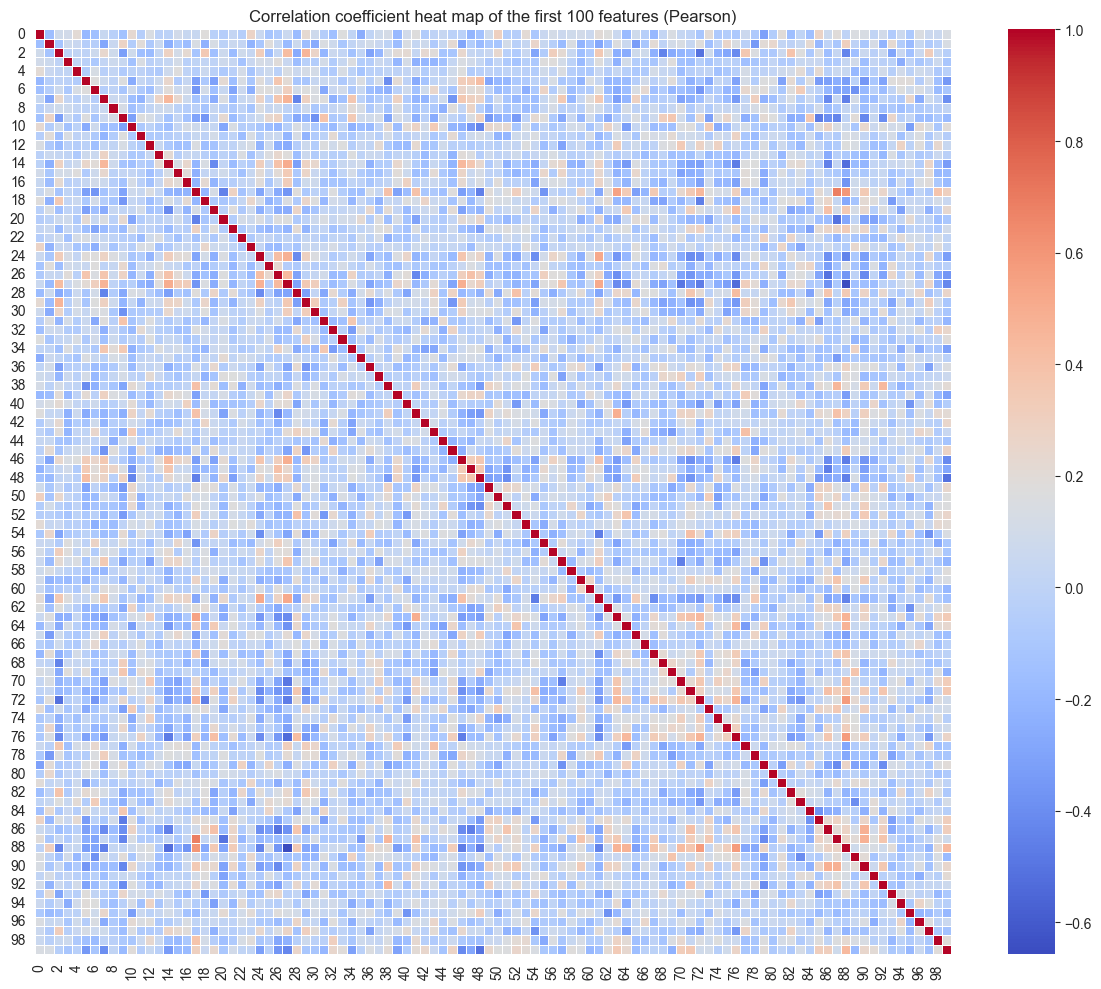

In [132]:
# 计算皮尔逊相关系数矩阵（特征与特征之间）
corr_matrix = X_train.corr()

# 可视化前30个特征的热力图
subset = X_train.iloc[:, :100]
corr_subset = subset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation coefficient heat map of the first 100 features (Pearson)")
plt.tight_layout()
plt.show()

In [133]:
#找出高相关的特征对
threshold = 0.9
s_corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(s_corr_matrix.shape), k=1).astype(bool))

# 找出高于阈值的特征对
high_corr_pairs = [(col, row, s_corr_matrix.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if pd.notnull(upper.loc[row, col]) and upper.loc[row, col] > threshold]

# 显示结果
if len(high_corr_pairs)>0:
    print("高于 0.9 的特征对（可能冗余）:")
    for a, b, c in high_corr_pairs:
        print(f"{a} ↔ {b} → 相关系数: {c:.3f}")
else:
    print("没有强相关的特征对")


没有强相关的特征对


In [134]:
# 结论6:特征之间较为独立，彼此不会线性重复 
# 多重共线性风险较低，线性模型（如 Logistic Regression）更稳定
# 无需手动剔除特征，可以保留全部特征继续建模

In [135]:
#6. PCA（主成分分析）降维与可视化 PCA (Principal Component Analysis) Dimensionality Reduction and Visualization

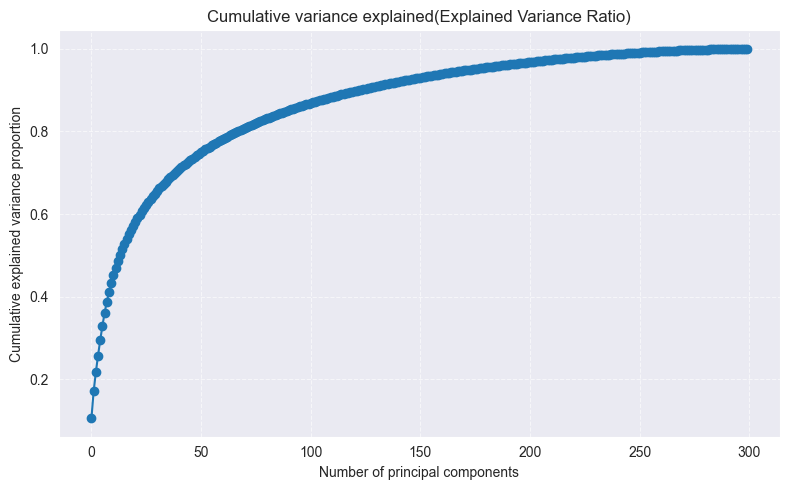

In [136]:
# 拟合 PCA 模型，保留全部 300 个主成分
pca = PCA(n_components=300)
pca.fit(X_train)

# 查看每个主成分解释的方差占比
explained_variance_ratio = pca.explained_variance_ratio_

# 累积贡献率曲线图
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title("Cumulative variance explained(Explained Variance Ratio)")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance proportion")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [137]:
# 结论7: 前两个主成分仅解释 17.07%，说明特征信息非常“高维且均匀”，维度确实对整体意思表达存在重要作用

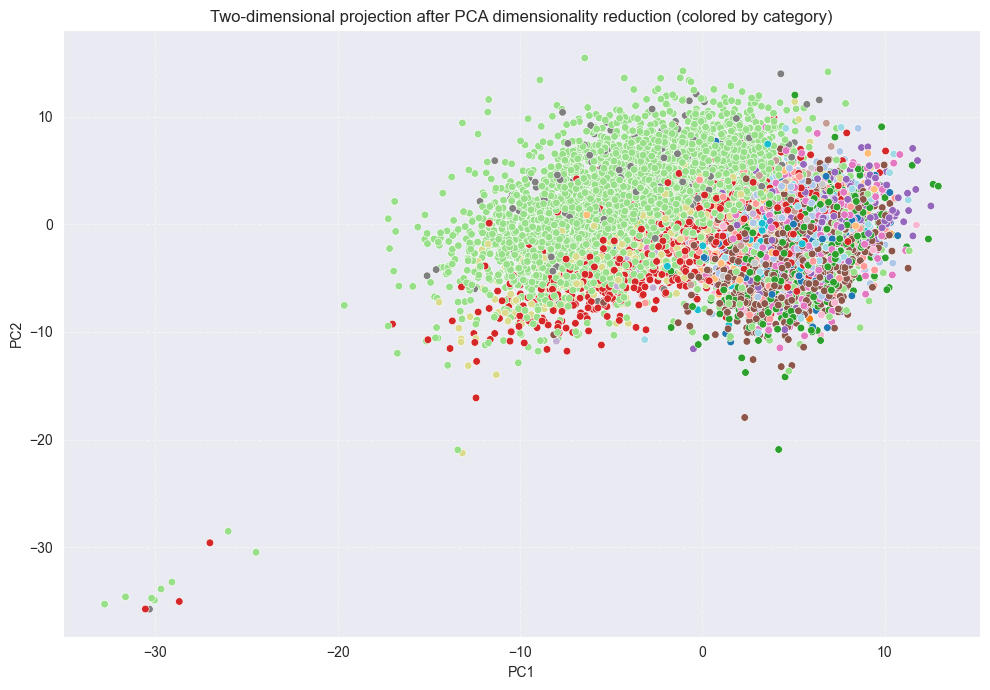

In [138]:
# 用 PCA 将数据降到二维
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train)

# 合并标签
X_pca_df = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
X_pca_df["label"] = y_train["label"]

# 可视化（使用 Seaborn）
plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_pca_df, x="PC1", y="PC2", hue="label", palette="tab20", legend=False, s=30)
plt.title("Two-dimensional projection after PCA dimensionality reduction (colored by category)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [139]:
# 结论8: 
# 不能大幅度压缩维度来建模
# 可用于 2D 可视化、探索聚类趋势
# 不适合直接用降维后数据代替原始数据训练模型

In [140]:
# ******************************   EDA finished   ******************************

In [141]:
# 二. 数据处理

In [142]:
# 离群值处理（IQR裁剪）
X_clipped = X_train.copy()
for col in X_clipped.columns:
    q1 = X_clipped[col].quantile(0.25)
    q3 = X_clipped[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    X_clipped[col] = X_clipped[col].clip(lower, upper)

In [143]:
y = y_train["label"]

In [144]:
# RobustScaler 缩放
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_clipped)

/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:23:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-mlogloss:2.68823
[1]	validation_0-mlogloss:2.43680
[2]	validation_0-mlogloss:2.25791
[3]	validation_0-mlogloss:2.11853
[4]	validation_0-mlogloss:2.00513
[5]	validation_0-mlogloss:1.90959
[6]	validation_0-mlogloss:1.82501
[7]	validation_0-mlogloss:1.74988
[8]	validation_0-mlogloss:1.68440
[9]	validation_0-mlogloss:1.62599
[10]	validation_0-mlogloss:1.57265
[11]	validation_0-mlogloss:1.52614
[12]	validation_0-mlogloss:1.48185
[13]	validation_0-mlogloss:1.44124
[14]	validation_0-mlogloss:1.40512
[15]	validation_0-mlogloss:1.37151
[16]	validation_0-mlogloss:1.34059
[17]	validation_0-mlogloss:1.31270
[18]	validation_0-mlogloss:1.28592
[19]	validation_0-mlogloss:1.26112
[20]	validation_0-mlogloss:1.23878
[21]	validation_0-mlogloss:1.21772
[22]	validation_0-mlogloss:1.19951
[23]	validation_0-mlogloss:1.18198
[24]	validation_0-mlogloss:1.16479
[25]	validation_0-mlogloss:1.14997
[26]	validation_0-mlogloss:1.13628
[27]	validation_0-mlogloss:1.12248
[28]	validation_0-mlogloss:1.1

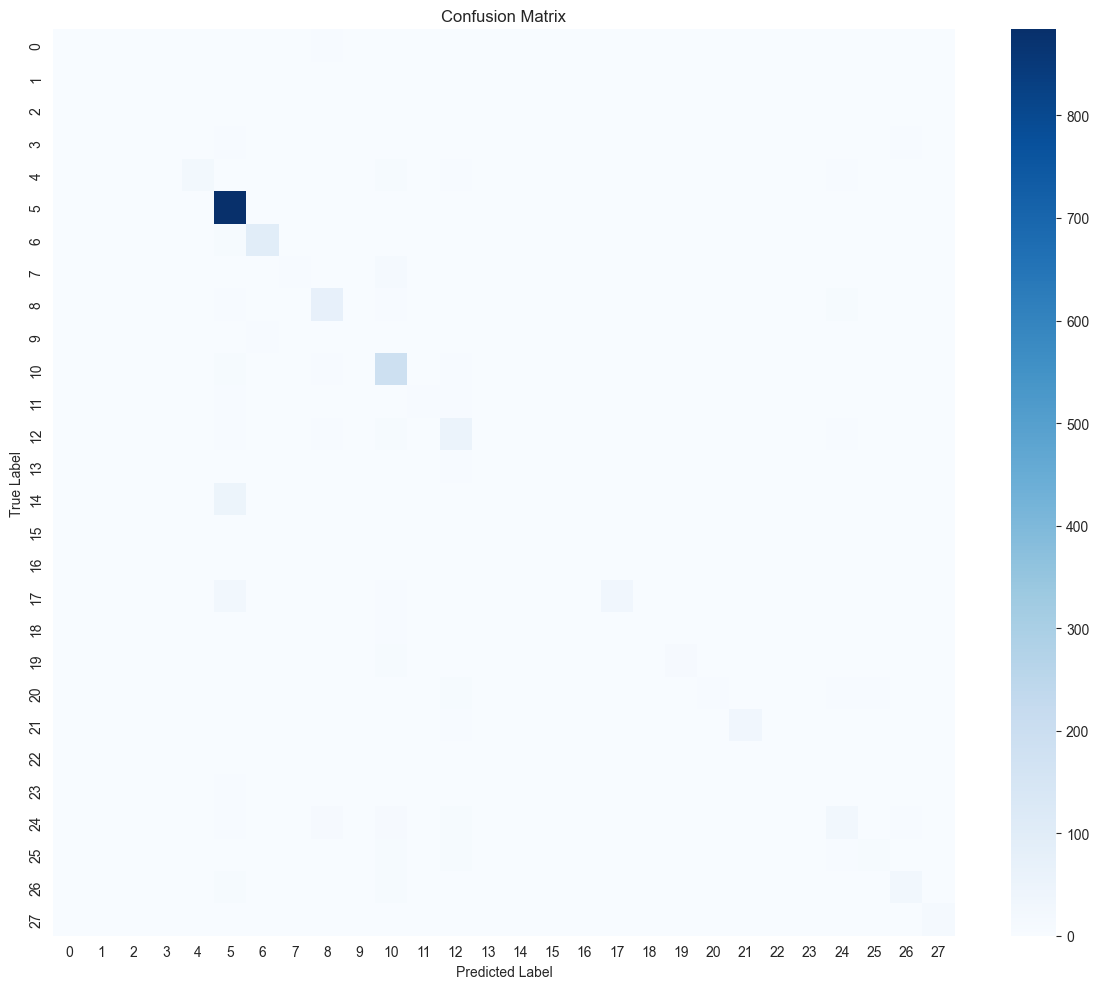

In [145]:
# 划分训练集和验证集（分层采样）
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 训练 XGBoost（兼容旧版）
model = XGBClassifier(
    objective='multi:softprob',     # 多分类 + 概率输出
    num_class=28,                   # 你总共 28 类
    eval_metric='mlogloss',         # 多分类交叉熵损失
    use_label_encoder=False,        # 避免警告（新版参数）
    n_estimators=100,               # 总共训练 100 轮
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(
    X_train_sub,
    y_train_sub,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# 评估
y_pred = model.predict(X_val)

print("\n分类报告：")
print(classification_report(y_val, y_pred, zero_division=0))

# F1-score 提取
f1_macro = f1_score(y_val, y_pred, average='macro')
f1_weighted = f1_score(y_val, y_pred, average='weighted')
print(f"宏平均 F1-score (macro): {f1_macro:.4f}")
print(f"加权平均 F1-score (weighted): {f1_weighted:.4f}")

# 混淆矩阵
conf_mat = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=False, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:23:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-mlogloss:2.47905
[1]	validation_0-mlogloss:2.13858
[2]	validation_0-mlogloss:1.89986
[3]	validation_0-mlogloss:1.71391
[4]	validation_0-mlogloss:1.56173
[5]	validation_0-mlogloss:1.43093
[6]	validation_0-mlogloss:1.31886
[7]	validation_0-mlogloss:1.22052
[8]	validation_0-mlogloss:1.13417
[9]	validation_0-mlogloss:1.05581
[10]	validation_0-mlogloss:0.98528
[11]	validation_0-mlogloss:0.92072
[12]	validation_0-mlogloss:0.86286
[13]	validation_0-mlogloss:0.80934
[14]	validation_0-mlogloss:0.75999
[15]	validation_0-mlogloss:0.71610
[16]	validation_0-mlogloss:0.67424
[17]	validation_0-mlogloss:0.63593
[18]	validation_0-mlogloss:0.60140
[19]	validation_0-mlogloss:0.56852
[20]	validation_0-mlogloss:0.53859
[21]	validation_0-mlogloss:0.51029
[22]	validation_0-mlogloss:0.48397
[23]	validation_0-mlogloss:0.45955
[24]	validation_0-mlogloss:0.43642
[25]	validation_0-mlogloss:0.41525
[26]	validation_0-mlogloss:0.39528
[27]	validation_0-mlogloss:0.37640
[28]	validation_0-mlogloss:0.3

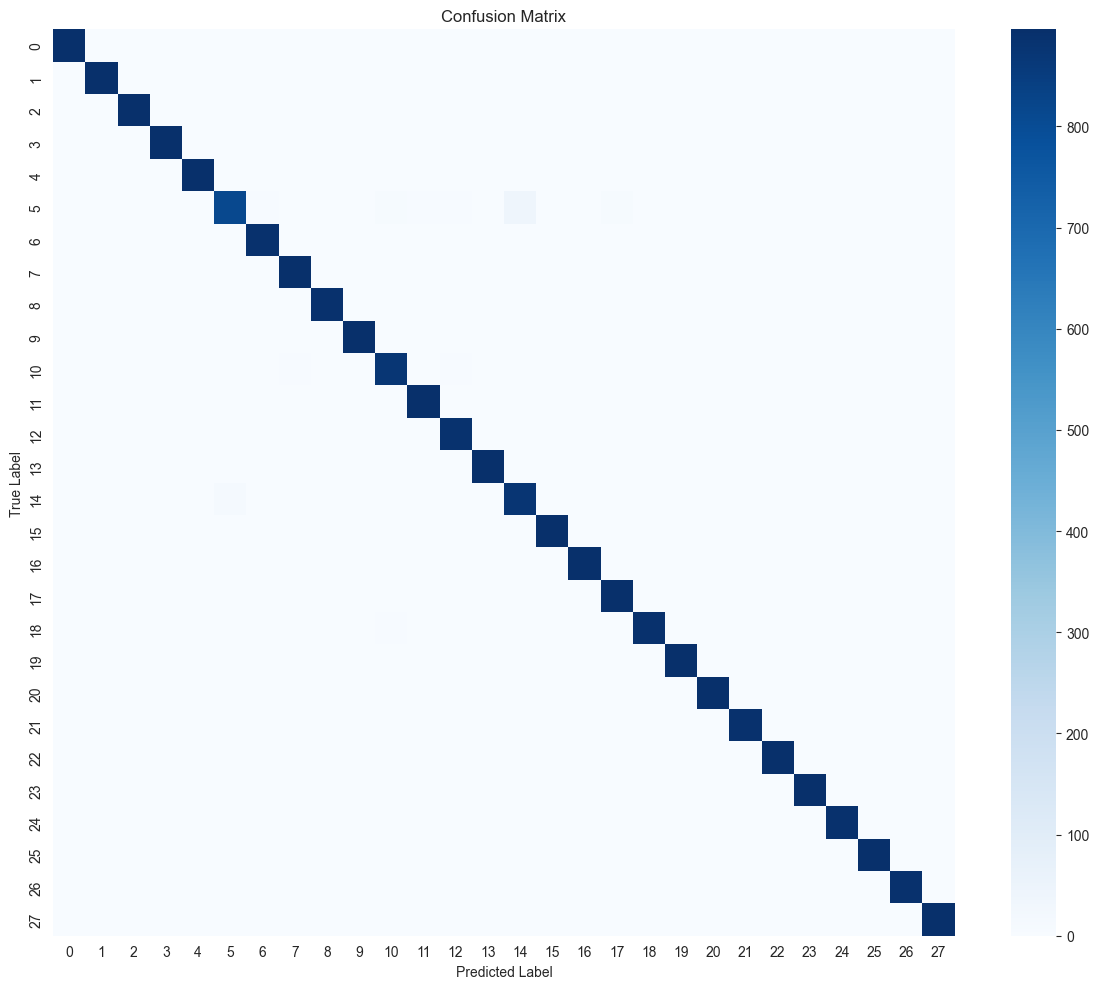

In [146]:
# SMOTE 过采样（k_neighbors 自动调小一点）
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)
model = XGBClassifier(
    objective='multi:softprob',
    num_class=28,  # 0~27 共 28 类
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# 评估结果
y_pred = model.predict(X_val)

print("\n 分类报告：")
print(classification_report(y_val, y_pred, zero_division=0))

# 宏平均 / 加权平均 F1-score
f1_macro = f1_score(y_val, y_pred, average='macro')
f1_weighted = f1_score(y_val, y_pred, average='weighted')
print(f"宏平均 F1-score (macro): {f1_macro:.4f}")
print(f"加权 F1-score (weighted): {f1_weighted:.4f}")

# 混淆矩阵可视化
conf_mat = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, cmap="Blues", annot=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()